In [32]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import pandas as pd
import torch
from collections import Counter

In [23]:
pwd!

'/sfs/qumulo/qproject/class/bii_sdad_dspg/uva_2021/binn'

In [24]:
df = pd.read_excel(r"data.xlsx", index_col=0) #This excel file was pre processed to have columns CompanyName and CompanyName2
df_yes = df[df.YN_INNOVATION == 'yes']
df_yes = df_yes[["full_text","CompanyName","CompanyName2"]]
df_yes

,full_text,CompanyName,CompanyName2
0,Creaform and Metrologic Group Announce Worldwi...,Creaform,Metrologic Group
7,BoardwalkTech; Boardwalktech Announces BW.Supp...,BoardwalkTech,NaN
12,"American LegalNet, Inc. American LegalNet Anno...","American LegalNet, Inc.",American LegalNet (ALN)
13,Barron's Blog: HP's Donatelli: Pulling Stuff O...,HP,Hewlett-Packard ( HPQ)
16,eASIC Corporation; eASIC Joins the OpenPOWER F...,eASIC Corporation,eASIC
...,...,...,...
570,Application Software Companies; Red Hat Breaks...,Red Hat,NaN
584,Rocket Fuel Introduces Next Generation Mobile ...,Rocket Fuel,NaN
588,Shopify Develops New Program for Expert Users ...,Shopify,NaN
596,Transaction Network Services; TNS Unveils Uniq...,Transaction Network Services,NaN


In [26]:
df_new = pd.read_csv("/home/asr8r/git/dspg21binn/data/DNA_Food_Articles_2017_no_rep.csv", index_col=0) ## Reading in data
#df_save = df.reset_index(inplace=False, drop = True)
df_new = df_new.reset_index(inplace=False, drop = True)
#df_new.company_codes 
df_new

,index,copyright,subject_codes,art,modification_datetime,body,company_codes_occur_ticker_exchange,company_codes_occur,company_codes_about,company_codes_lineage,...,company_codes,industry_codes,title,publication_datetime,publisher_name,action,document_type,date,year,full_text
0,15,© Copyright 2017 Journal of Engineering via Ve...,",ccat,",NaN,1489442488000,Those respondents with advanced full life cycl...,NaN,",comasc,",",comasc,",NaN,...,",comasc,comasc,comasc,",",imobsoft,i3302,i330202,i3302021,icomp,itech,",CA Technologies; Are You Getting the Most Valu...,1489363200000,"NewsRX, LLC",add,article,2017-03-13 00:00:00.000,2017,CA Technologies; Are You Getting the Most Valu...
1,18,© Copyright 2017 Computer Weekly News via via ...,",ccat,",NaN,1487890959000,The Access Valve for ThingWorx integrates an o...,NaN,NaN,NaN,NaN,...,NaN,",isecpri,iioft,i3302,i330202,i3302021,i3303,ic...","Certified Security Solutions, Inc. CSS Release...",1487808000000,"NewsRX, LLC",add,article,2017-02-23 00:00:00.000,2017,"Certified Security Solutions, Inc. CSS Release..."
2,26,Copyright 2017 Telecompaper. All Rights Reserv...,",ccat,c22,cprdop,c24,ncat,nfact,nfcpin,",NaN,1508513602000,Cortana on the new speaker will look up inform...,NaN,",mcrost,harmki,gognew,bstbuy,amzcom,",",mcrost,harint,bstbuy,harmki,",",sansel,",...,",harmki,amzcom,amzcom,bstbuy,bstbuy,gognew,gog...",",i34532,i3302,icnp,idurhg,ielec,ihome,itech,i3...",Harman Kardon launches smart speaker with Micr...,1508457600000,Telecompaper BV,add,article,2017-10-20 00:00:00.000,2017,Harman Kardon launches smart speaker with Micr...
3,36,"© Copyright 2017 GlobeNewswire, Inc. All Right...",",cpartn,ccpint,npress,c11,ccat,ncat,",NaN,1484229727000,"According to Lee Nagel, vice president of mark...",NaN,",orncmi,onlnfr,linkd,",NaN,NaN,...,",linkd,linkd,onlnfr,onlnfr,orncmi,orncmi,twnit,",",ibisw,i3302021,i3302,i330202,icomp,itech,",Izenda Partners with Orion Communications to P...,1484229604057,"GlobeNewswire, Inc.",add,article,2017-01-12 14:00:04.057,2017,Izenda Partners with Orion Communications to P...
4,57,© Copyright 2017 Computer Weekly News via via ...,",ccat,",NaN,1503007605000,Given its aggressive plans to take more market...,NaN,",hubspo,",",hubspo,",NaN,...,",hubspo,hubspo,hubspo,salesf,",",icomp,i3302,itech,i330202,i3302021,ientrps,",Qstream; HubSpot Signs Global Agreement with Q...,1502928000000,"NewsRX, LLC",add,article,2017-08-17 00:00:00.000,2017,Qstream; HubSpot Signs Global Agreement with Q...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101138,1293014,© Copyright 2017 The Taipei Times. All rights ...,",ghack,nnam,gcat,gcrim,ncat,nfact,nfce,nfcpex,...",NaN,1491373095000,"Its targets included banks, financial and trad...",NaN,",usagov,kaspy,frbny,banbk,",",kaspy,frbny,banbk,",NaN,...,",banbk,frbny,kaspy,banbk,banbk,frbny,frbny,kas...",",i81401,i814,ibnk,ifinal,i3302,i330202,i330202...",More proof N Korea linked to Bangladesh heist:...,1491350400000,Liberty Times Ltd.,add,article,2017-04-05 00:00:00.000,2017,More proof N Korea linked to Bangladesh heist:...
101139,1293020,Distributed by Tribune Content Agency,",gamer,guni,gcat,gedu,gspo,ncat,nfact,nfce,nrgn,",NaN,1494177346000,COMMITMENTS\n\nCameron Murray\n\nPosition: Saf...,NaN,",dalcow,wvgsty,uvclla,uowyom,twnit,smunii,pens...",",dbpuqw,uowyom,",NaN,...,",uowyom,bllsty,bllsty,botncg,botncg,brghyu,brg...",",i3302,i83941,icomp,itech,",2018 Wyoming football recruiting tracker,1494115200000,Tribune Content Agency,add,article,2017-05-07 00:00:00.000,2017,2018 Wyoming football recruiting tracker May 0...
101140,1293029,© Copyright 2017 Blood Weekly via NewsRx.com,",gcancr,gcrese,ccat,gleuk,gcat,ghea,gmed,gsci,",NaN,1501193383000,Our news journalists obtained a quote from the...,NaN,",ntnct,elsv,",",ntnct,ibm,",NaN,...,",elsv,elsv,ntnct,ntnct,ibm,ntnct,",",i8394,ibcs,",Oncology - Acute Myelogenous Leukemia; New Fin...,1501113600000,"NewsRX, LLC",add,article,2017-07-27 00:00:00.000,2017,Oncol

In [31]:
len(df_new.publisher_name.unique()) #How many unique publishers

825

In [33]:
Counter(df_new.publisher_name)

Counter({'NewsRX, LLC': 29018,
         'Telecompaper BV': 183,
         'GlobeNewswire, Inc.': 2693,
         'Condé Nast': 9,
         'Normans Media Ltd': 5587,
         'Namibia Media Holdings': 72,
         'Ventures Africa': 38,
         'Shaw Media': 48,
         'The Associated Press': 349,
         'American City Business Journals': 1661,
         'Newsquest (Herald and Times) LTD and Newsquest (Sunday Herald) LTD': 9,
         'MediaNews Group Inc.': 431,
         'iCrowdNewswire, LLC': 1897,
         'News Bites Pty Ltd (Europe)': 5475,
         'Theflyonthewall.com': 694,
         'Yemen News Agency': 122,
         'APG Media of Chesapeake, LLC': 18,
         'Business Wire, Inc.': 7173,
         'Galadari Printing & Publishing LLC': 204,
         'SNL Financial LC': 478,
         'Athena Information Solutions Pvt. Ltd.': 2796,
         'Schurz Communications, Inc.': 330,
         'Advance Publications, Inc.': 431,
         'India Express Mumbai Limited': 113,
         'Gan

In [8]:
device = torch.device("cuda")

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)


the_matches = []
the_scores = []
the_yn_matches = []

for article in range(222):
    example = df_yes.iloc[article,0]     #full_text of article
    ner_results = nlp(example)     #running nlp 
    ner_df = pd.DataFrame(ner_results)     #results of nlp
    Org = ner_df[ner_df.entity_group == ("ORG") ] #all the ORG's in results 
    
    the_company_name =[]
    comp_name2=[]
    match_scores =[]
    correct_guesses = []
    yn_match = []
    
    for i in range(len(Org.iloc[:,2])):      #cycling through each ORG in results
        company_name = df_yes.iloc[article,1] #Company Name from labeled data
        company_name2 = df_yes.iloc[article,2] 
        guess = Org.iloc[i,2]
        if guess == company_name or guess == company_name2:

            correct_guesses.append(guess)

            match_score = Org.iloc[i,1]
            match_scores.append(match_score)
            the_company_name.append(company_name)
            comp_name2.append(company_name2)
            yn_match.append(1)
        else:
            match_scores.append(match_score)
            correct_guesses.append(guess)
            the_company_name.append(company_name)
            comp_name2.append(company_name2)
            yn_match.append(0)

   
    dict = {'company_name': the_company_name, 'company_name_2':comp_name2, 'match_score': match_scores, 'correct_guesses': correct_guesses,"yn_match":yn_match} 
    df = pd.DataFrame(dict)
    df = df.sort_values(by=['match_score'],ascending = False)
    the_match = df.iloc[0,3]
    the_score = df.iloc[0,2]
    the_yn_match = df.iloc[0,4]
    
    the_matches.append(the_match)
    the_scores.append(the_score)
    the_yn_matches.append(the_yn_match)
    
    
dict = {'Matches': the_matches, "Scores":the_scores,"the_yn_matches": the_yn_matches}
final_results= pd.DataFrame(dict)
final_results
    

,Matches,Scores,the_yn_matches
0,Metrologic Group,0.998697,1
1,BoardwalkTech,0.868677,1
2,"American LegalNet, Inc",0.868677,0
3,HP Labs,0.998549,0
4,Foundation,0.997002,0
...,...,...,...
217,Red Hat,0.997261,1
218,Rocket Fuel,0.998393,1
219,Shopify,0.993464,1
220,Transaction Network Services,0.998566,1


array([[<AxesSubplot:title={'center':'Scores'}>,
        <AxesSubplot:title={'center':'the_yn_matches'}>]], dtype=object)

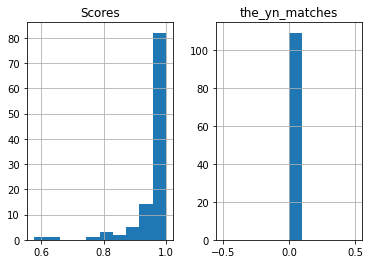

In [17]:
non_matches = final_results[final_results["the_yn_matches"]==0]
hist = non_matches.hist(bins=10)
hist

In [9]:
df_all = pd.concat([df_yes.reset_index(drop=True), final_results.reset_index(drop=True)], axis=1, ignore_index=True)
df_all

,0,1,2,3,4,5
0,Creaform and Metrologic Group Announce Worldwi...,Creaform,Metrologic Group,Metrologic Group,0.998697,1
1,BoardwalkTech; Boardwalktech Announces BW.Supp...,BoardwalkTech,NaN,BoardwalkTech,0.868677,1
2,"American LegalNet, Inc. American LegalNet Anno...","American LegalNet, Inc.",American LegalNet (ALN),"American LegalNet, Inc",0.868677,0
3,Barron's Blog: HP's Donatelli: Pulling Stuff O...,HP,Hewlett-Packard ( HPQ),HP Labs,0.998549,0
4,eASIC Corporation; eASIC Joins the OpenPOWER F...,eASIC Corporation,eASIC,Foundation,0.997002,0
...,...,...,...,...,...,...
217,Application Software Companies; Red Hat Breaks...,Red Hat,NaN,Red Hat,0.997261,1
218,Rocket Fuel Introduces Next Generation Mobile ...,Rocket Fuel,NaN,Rocket Fuel,0.998393,1
219,Shopify Develops New Program for Expert Users ...,Shopify,NaN,Shopify,0.993464,1
220,Transaction Network Services; TNS Unveils Uniq...,Transaction Network Services,NaN,Transaction Network Services,0.998566,1


In [11]:
import matplotlib.pyplot as plt
final_results.hist

<bound method hist_frame of                           Matches    Scores  the_yn_matches
0                Metrologic Group  0.998697               1
1                   BoardwalkTech  0.868677               1
2          American LegalNet, Inc  0.868677               0
3                         HP Labs  0.998549               0
4                      Foundation  0.997002               0
..                            ...       ...             ...
217                       Red Hat  0.997261               1
218                   Rocket Fuel  0.998393               1
219                       Shopify  0.993464               1
220  Transaction Network Services  0.998566               1
221            Dragontail Systems  0.998820               1

[222 rows x 3 columns]>

In [152]:
df_all.to_csv(r'git\bertbase-NER-results.csv', index = False)